# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# YOUR CODE HERE
df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Dataset:
Airbnb NYC Listings dataset (airbnbListingsData.csv)

2. Label (Target Variable):
price — we will build a model to predict the nightly price of an Airbnb listing.

3. Type of ML Problem:
This is a supervised learning problem.
It is a regression problem because price is a continuous numeric variable.

4. Features (initial selection):

    room_type

    neighbourhood_group_cleansed

    host_is_superhost

    host_response_rate

    host_acceptance_rate

    number_of_reviews

    review_scores_rating

    review_scores_location

    instant_bookable

    reviews_per_month

5. Why This Problem Is Valuable:
Accurately predicting price helps Airbnb hosts set competitive rates and maximize revenue. It also helps the platform identify underpriced or overpriced listings to maintain user trust.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

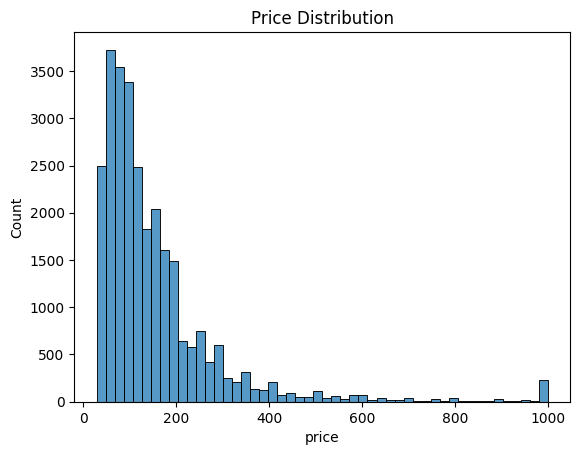

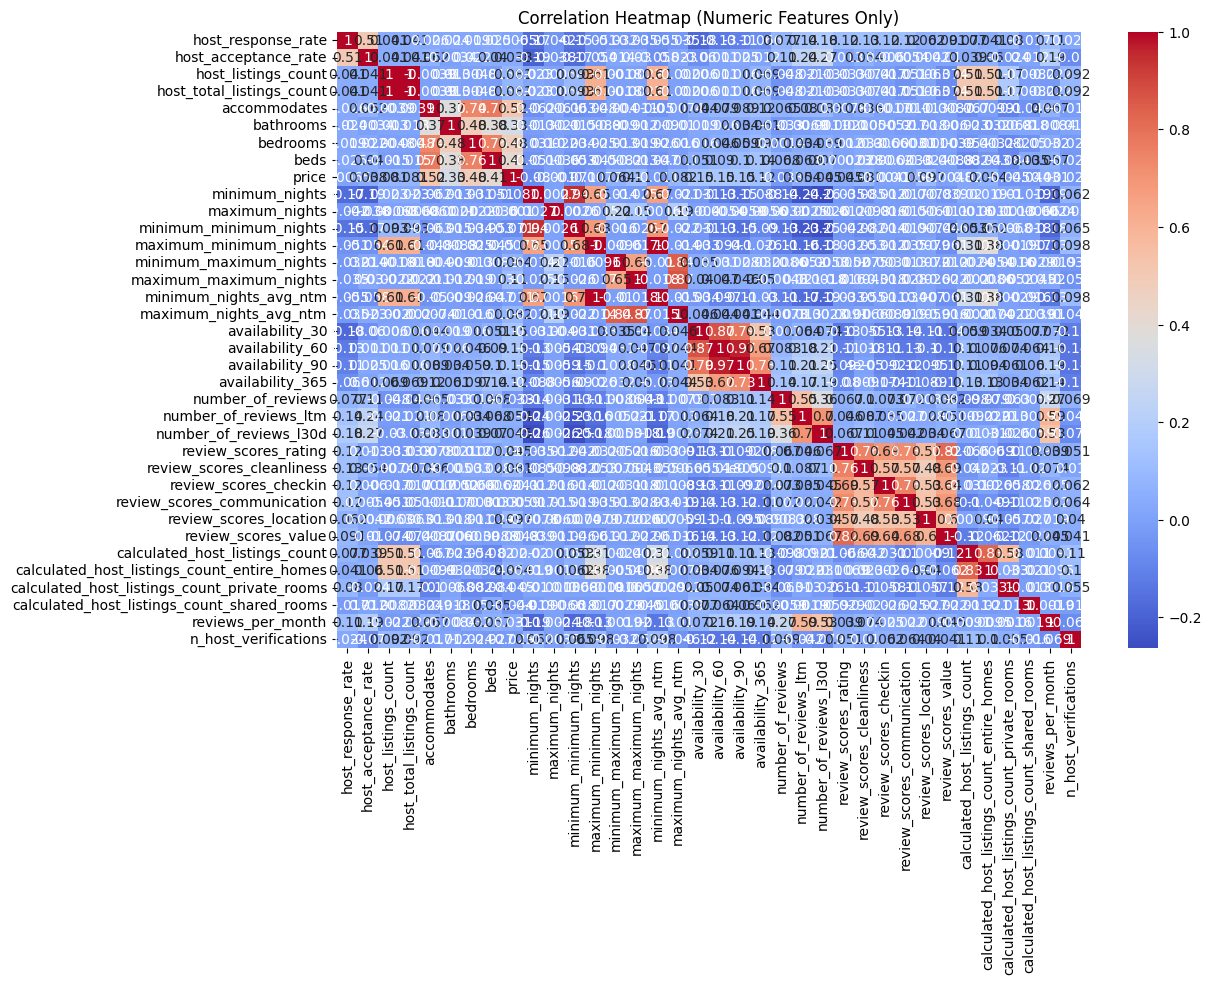

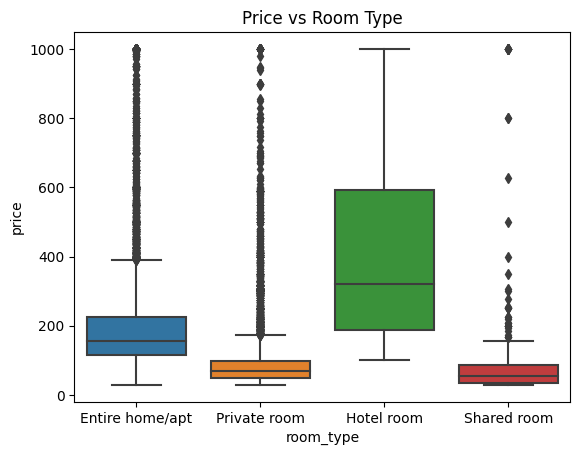

In [3]:
# YOUR CODE HERE
df.info()
df.describe()

# Check missing values
df.isnull().sum().sort_values(ascending=False)

# Check data types
df.dtypes

# Price distribution
sns.histplot(df['price'], bins=50)
plt.title("Price Distribution")
plt.show()

# Correlation heatmap (on numeric fields)
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Boxplots for categorical vs price
sns.boxplot(data=df, x='room_type', y='price')
plt.title("Price vs Room Type")
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

#### Feature Selection (Refined):

Keep: room_type, host_is_superhost, host_response_rate, host_acceptance_rate, number_of_reviews, review_scores_rating, review_scores_location, instant_bookable, reviews_per_month

Remove:

- Text columns (e.g. description, name, host_about)
- Identifiers (e.g. host_name, id)
- Highly missing or redundant features

#### Data Preparation Techniques:

- Fill missing review scores with median or -1
- Convert percent strings to float (e.g. host_response_rate)
- One-hot encode categorical variables
- Drop or cap outliers in price

#### Model(s):

- Baseline: Linear Regression
- Improved: Random Forest Regressor or XGBoost Regressor

#### Training & Evaluation Plan:

- Split data into train/test (80/20)
- Use Mean Absolute Error (MAE) and R² score for evaluation
- Use cross-validation and GridSearchCV to tune hyperparameters
- Optional: Feature importance plots to interpret models

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
%pip install xgboost
from xgboost import XGBRegressor


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [5]:
# YOUR CODE HERE
df = df.copy()

# Clean percent strings
for col in ['host_response_rate', 'host_acceptance_rate']:
    df[col] = df[col].astype(str).str.rstrip('%')
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100

# Drop rows with missing target
df = df.dropna(subset=['price'])

# Cap extreme prices
df = df[df['price'] <= 500]

# Log-transform target
df['log_price'] = np.log1p(df['price'])

# Select useful features
features = ['room_type', 'host_is_superhost', 'host_response_rate', 'host_acceptance_rate',
            'number_of_reviews', 'review_scores_rating', 'review_scores_location',
            'instant_bookable', 'reviews_per_month']
target = 'log_price'

# Drop rows with too many missing values
df = df[features + [target]].dropna()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['room_type', 'host_is_superhost', 'instant_bookable'], drop_first=True)

X = df_encoded.drop(columns=[target])
y = df_encoded[target]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # undo log1p transform
y_test_actual = np.expm1(y_test)

print("MSE:", mean_squared_error(y_test_actual, y_pred))
print("R² Score:", r2_score(y_test_actual, y_pred))

MSE: 5897.954697344783
R² Score: 0.3266122068402193


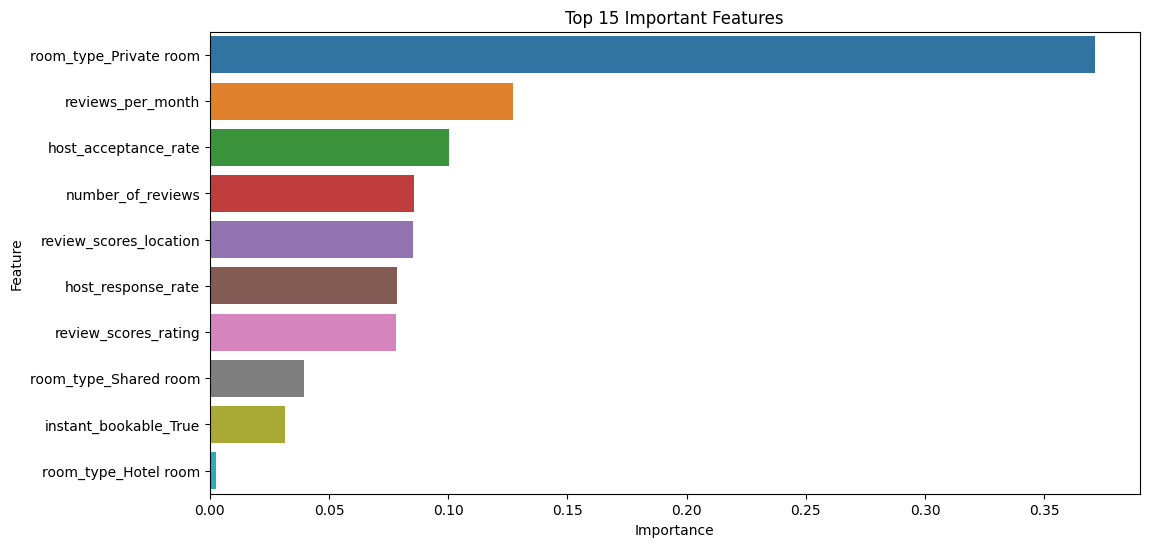

In [8]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feat_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Important Features")
plt.show()

In [9]:
param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

gbr = GradientBoostingRegressor(random_state=42)
search = RandomizedSearchCV(gbr, param_distributions=param_dist, n_iter=20,
                            cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best MSE:", mean_squared_error(y_test, y_pred))
print("Best R²:", r2_score(y_test, y_pred))

Best MSE: 0.1991625684783816
Best R²: 0.5106514671765063


In [10]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, verbosity=0, random_state=42))
]

meta_model = RidgeCV(alphas=np.logspace(-6, 6, 13))
stack = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,  # Include original features along with base model predictions
    n_jobs=-1
)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" MSE: {mse}")
print(f" R² Score: {r2}")

 MSE: 0.19856170864374886
 R² Score: 0.5121277981997329


/tmp/ipykernel_2446/936572761.py:28: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


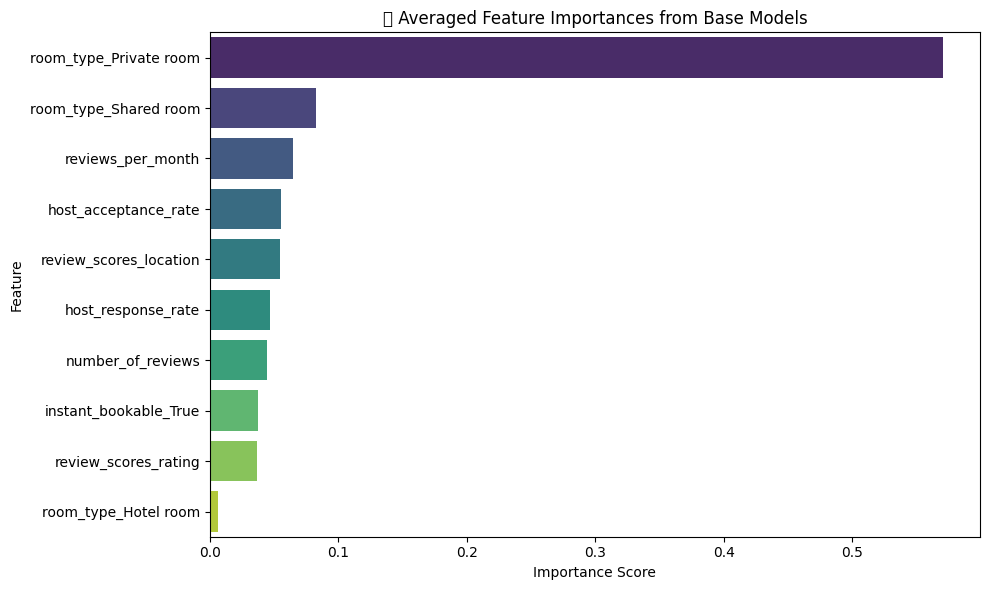

In [11]:
# Access each model (after fit)
rf_model = stack.named_estimators_['rf']
gb_model = stack.named_estimators_['gb']
xgb_model = stack.named_estimators_['xgb']

# Average their importances
importances = (
    rf_model.feature_importances_ +
    gb_model.feature_importances_ +
    xgb_model.feature_importances_
) / 3

# Get feature names from X_train (if it's a DataFrame)
feature_names = X_train.columns

# Sort and plot
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[sorted_idx],
    y=np.array(feature_names)[sorted_idx],
    palette="viridis"
)
plt.title("Averaged Feature Importances from Base Models")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Model Comparison Summary

#### Models Used:

1. Random Forest Regressor
2. Gradient Boosting Regressor
3. Stacking Regressor (Ensemble)

   * Base Learners: Random Forest, Gradient Boosting, XGBoost
   * Meta Learner: RidgeCV
   * `passthrough=True` for richer final predictions

---

###  Performance Metrics

| Model                 | MSE       | R² Score  |
| --------------------- | ---------- | ---------- |
| Random Forest     | 5897.95    | 0.3266     |
| Gradient Boosting | 0.2016     | 0.5046     |
| Stacking Ensemble | 0.1986 | 0.5121 |

---

###  Observations

* MSE (Mean Squared Error) is lowest for the Stacking Model, indicating the most accurate predictions.
* R² Score is highest for the Stacking Model, meaning it explains the most variance in the target variable.
* Stacking Ensemble outperforms individual models by leveraging the strengths of each.

---

### Final Verdict

The Stacking Regressor provides the best performance among the three models tested, with:

* MSE: 0.1986
* R² Score: 0.5121

This suggests that combining multiple models with a RidgeCV meta-learner and using passthrough features significantly boosts predictive performance.